In [9]:
import numpy as np
import pandas as pd
from PIL import Image

In [10]:
!pip install wordcloud

In [17]:
import numpy as np
import pandas as pd
from PIL import Image
from wordcloud import WordCloud, STOPWORDS

import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches

In [13]:
df_can = pd.read_excel('Canada(2).Xlsx',
                      sheet_name = 'Canada by Citizenship',
                      skiprows = range (20),
                      skipfooter = 2)
print(df_can)

           Type    Coverage          OdName  AREA AreaName   REG  \
0    Immigrants  Foreigners     Afghanistan   935     Asia  5501   
1    Immigrants  Foreigners         Albania   908   Europe   925   
2    Immigrants  Foreigners         Algeria   903   Africa   912   
3    Immigrants  Foreigners  American Samoa   909  Oceania   957   
4    Immigrants  Foreigners         Andorra   908   Europe   925   
..          ...         ...             ...   ...      ...   ...   
190  Immigrants  Foreigners        Viet Nam   935     Asia   920   
191  Immigrants  Foreigners  Western Sahara   903   Africa   912   
192  Immigrants  Foreigners           Yemen   935     Asia   922   
193  Immigrants  Foreigners          Zambia   903   Africa   910   
194  Immigrants  Foreigners        Zimbabwe   903   Africa   910   

                RegName  DEV             DevName  1980  ...  2012  2013  \
0         Southern Asia  902  Developing regions    16  ...  2635  2004   
1       Southern Europe  901   De

In [15]:
df_can.head()

,Type,Coverage,OdName,AREA,AreaName,REG,RegName,DEV,DevName,1980,...,2012,2013,Unnamed: 43,Unnamed: 44,Unnamed: 45,Unnamed: 46,Unnamed: 47,Unnamed: 48,Unnamed: 49,Unnamed: 50
0,Immigrants,Foreigners,Afghanistan,935,Asia,5501,Southern Asia,902,Developing regions,16,...,2635,2004,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Immigrants,Foreigners,Albania,908,Europe,925,Southern Europe,901,Developed regions,1,...,620,603,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Immigrants,Foreigners,Algeria,903,Africa,912,Northern Africa,902,Developing regions,80,...,3774,4331,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Immigrants,Foreigners,American Samoa,909,Oceania,957,Polynesia,902,Developing regions,0,...,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Immigrants,Foreigners,Andorra,908,Europe,925,Southern Europe,901,Developed regions,0,...,1,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [22]:
alice_novel = open('alice_novel.txt','r').read()
print(alice_novel)

ï»¿Project Gutenberg's Alice's Adventures in Wonderland, by Lewis Carroll

This eBook is for the use of anyone anywhere at no cost and with
almost no restrictions whatsoever.  You may copy it, give it away or
re-use it under the terms of the Project Gutenberg License included
with this eBook or online at www.gutenberg.org


Title: Alice's Adventures in Wonderland

Author: Lewis Carroll

Posting Date: June 25, 2008 [EBook #11]
Release Date: March, 1994
[Last updated: December 20, 2011]

Language: English


*** START OF THIS PROJECT GUTENBERG EBOOK ALICE'S ADVENTURES IN WONDERLAND ***










ALICE'S ADVENTURES IN WONDERLAND

Lewis Carroll

THE MILLENNIUM FULCRUM EDITION 3.0




CHAPTER I. Down the Rabbit-Hole

Alice was beginning to get very tired of sitting by her sister on the
bank, and of having nothing to do: once or twice she had peeped into the
book her sister was reading, but it had no pictures or conversations in
it, 'and what is the use of a book,' thought Alice 'without pict

In [23]:
stopwords = set(STOPWORDS)

In [25]:
alice_wc = WordCloud(
background_color = 'white',
max_words = 2000, stopwords = stopwords)

alice_wc.generate(alice_novel)

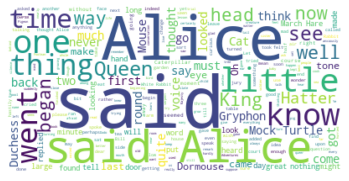

In [27]:
plt.imshow(alice_wc, interpolation = 'bilinear')
plt.axis('off')
plt.show()

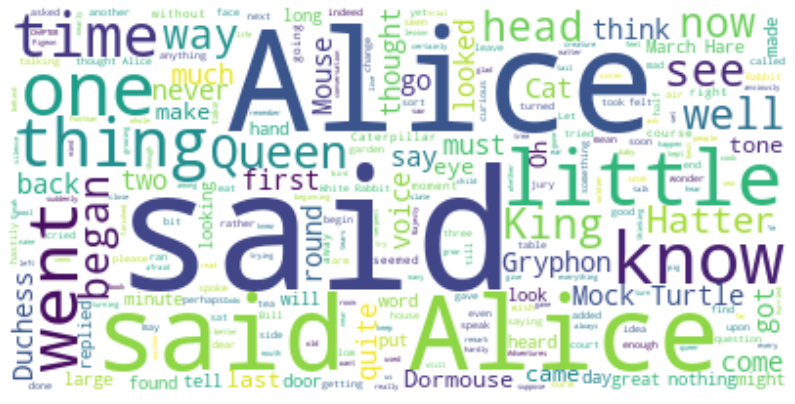

In [28]:
fig = plt.figure()
fig.set_figwidth(14)
fig.set_figheight(18)

plt.imshow(alice_wc, interpolation = 'bilinear')
plt.axis('off')
plt.show()

In [31]:
alice_mask = np.array(Image.open('alice_mask.png'))
print(len(alice_mask))

900


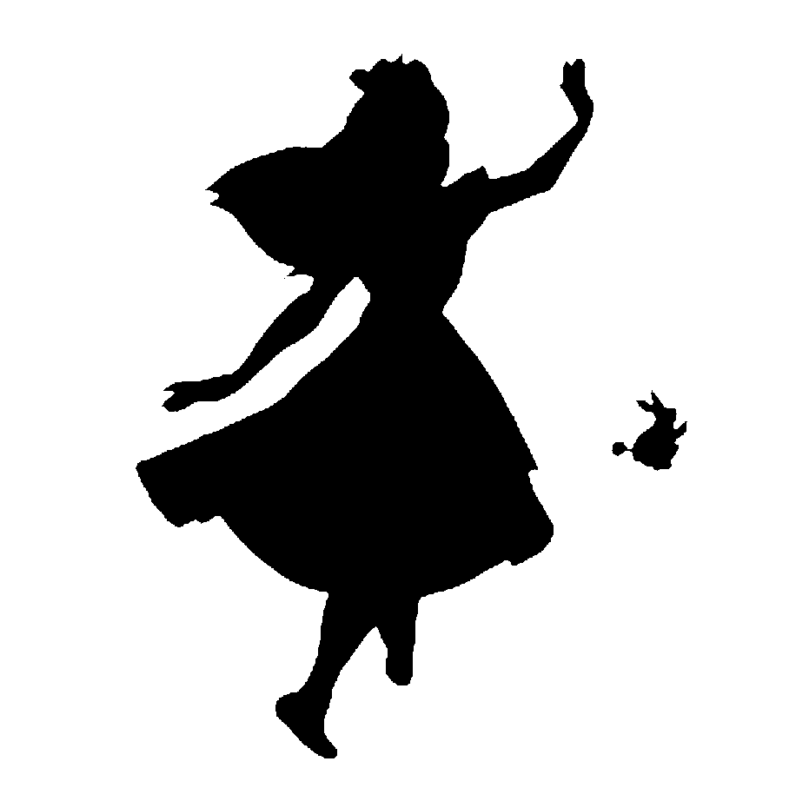

In [34]:
fig = plt.figure()

fig.set_figwidth(14)
fig.set_figheight(18)

plt.imshow(alice_mask, cmap = plt.cm.gray, interpolation = 'bilinear')
plt.axis('off')
plt.show()

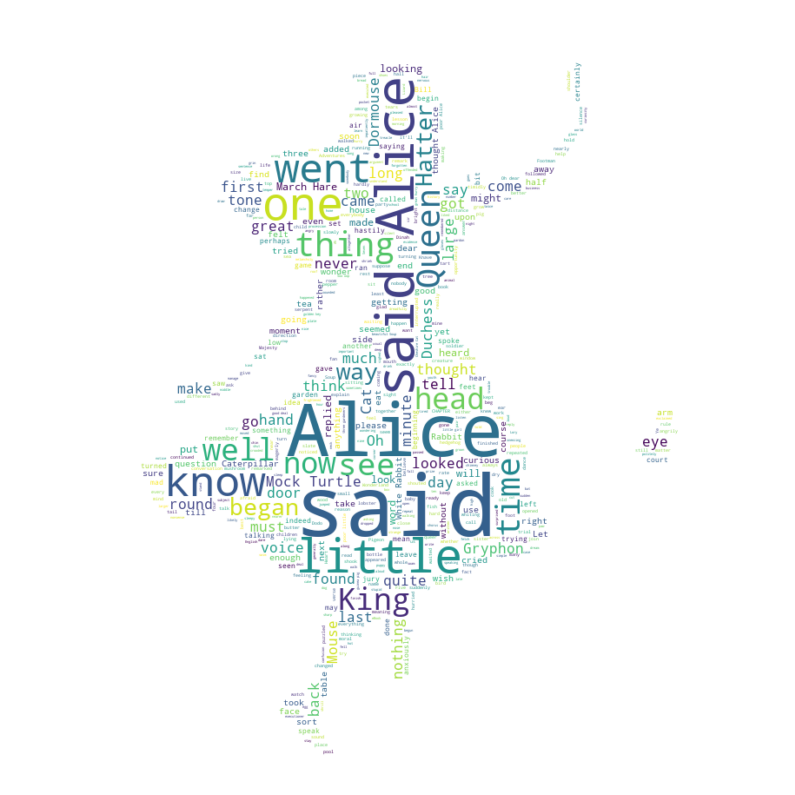

In [36]:
alice_wc = WordCloud(background_color = 'white', max_words = 2000, mask = alice_mask, stopwords = stopwords)

alice_wc.generate(alice_novel)

fig = plt.figure()
fig.set_figwidth(14)
fig.set_figheight(18)

plt.imshow(alice_wc, interpolation = 'bilinear')
plt.axis('off')
plt.show()

In [38]:
df_can = pd.read_excel('Canada(2).Xlsx',
                      sheet_name = 'Canada by Citizenship',
                      skiprows = range (20),
                      skipfooter = 2)
df_can.drop(['AREA', 'REG', 'DEV', 'Type', 'Coverage'], axis = 1, inplace = True)
df_can.rename(columns ={'OdName' : 'Country', 'AreaName' : 'Continent', 'RegName' : 'Region'}, inplace = True)
df_can.set_index('Country', inplace = True)
print(df_can)

               Continent              Region             DevName  1980  1981  \
Country                                                                        
Afghanistan         Asia       Southern Asia  Developing regions    16    39   
Albania           Europe     Southern Europe   Developed regions     1     0   
Algeria           Africa     Northern Africa  Developing regions    80    67   
American Samoa   Oceania           Polynesia  Developing regions     0     1   
Andorra           Europe     Southern Europe   Developed regions     0     0   
...                  ...                 ...                 ...   ...   ...   
Viet Nam            Asia  South-Eastern Asia  Developing regions  1191  1829   
Western Sahara    Africa     Northern Africa  Developing regions     0     0   
Yemen               Asia        Western Asia  Developing regions     1     2   
Zambia            Africa      Eastern Africa  Developing regions    11    17   
Zimbabwe          Africa      Eastern Af

In [40]:
years = range (1980,2014)

In [41]:
total_immigration = df_can['Total'].sum()
total_immigration

KeyError: 'Total'

In [42]:
max_words = 100
word_string =""
for country in df_can.index.values:
    if len (country.split(' ')) == 1:
        repeat_num_times =int(df_can.loc[country, 'Total']/float(total_immigration) * max_words)
        word_strings += (country + ' ') * repeat_nums
word_string

KeyError: 'Total'